# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [17]:
df.columns = df.columns.str.lower()
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [19]:
df = df.set_index("linename")
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [22]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [43]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df = df.sort_values(by=['Num_Lines'], ascending=False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12
132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-31,04:00:00,REGULAR,68217145,17201834,12
132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-30,20:00:00,REGULAR,68216902,17201755,12
132414,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,11:29:43,REGULAR,6291546,8895428,12
132412,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,08:00:00,REGULAR,6291234,8894593,12


## Write a function to clean a column name.

In [44]:
def clean(col_name):
    cleaned = col_name.strip(' ')
    return cleaned

In [45]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [46]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [47]:
df.date = pd.to_datetime(df.date)
print(df.date.dtype)
df.head(3)

datetime64[ns]


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12
132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-31,04:00:00,REGULAR,68217145,17201834,12
132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-30,20:00:00,REGULAR,68216902,17201755,12


In [53]:
#Traffic column is equal to entries + exits
df['traffic'] = df['entries'] + df['exits']
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,traffic
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,4684968
132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-31,04:00:00,REGULAR,68217145,17201834,12,85418979
132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-30,20:00:00,REGULAR,68216902,17201755,12,85418657
132414,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,11:29:43,REGULAR,6291546,8895428,12,15186974
132412,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,08:00:00,REGULAR,6291234,8894593,12,15185827


In [59]:
#get weekdays
df['Day'] = df.date.dt.dayofweek
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,traffic,Day
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,4684968,3
132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-31,04:00:00,REGULAR,68217145,17201834,12,85418979,4
132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-30,20:00:00,REGULAR,68216902,17201755,12,85418657,3
132414,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,11:29:43,REGULAR,6291546,8895428,12,15186974,1
132412,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,08:00:00,REGULAR,6291234,8894593,12,15185827,1


,entries,exits,Num_Lines,traffic
Day,,,,
0,1114237052454,911938153513,76110,2026175205967
1,1143313287046,942230721477,77303,2085544008523
2,1123655222441,920630864687,75713,2044286087128
3,1122723988662,920691927110,76607,2043415915772
4,1110224700078,906799065337,75573,2017023765415


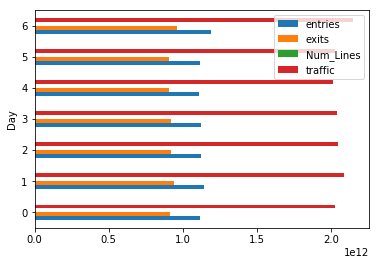

In [68]:
grouped = df.groupby('Day').sum()
grouped.plot(kind='barh')
grouped.head()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [69]:
grouped = grouped.reset_index()
grouped.head()

,Day,entries,exits,Num_Lines,traffic
0,0,1114237052454,911938153513,76110,2026175205967
1,1,1143313287046,942230721477,77303,2085544008523
2,2,1123655222441,920630864687,75713,2044286087128
3,3,1122723988662,920691927110,76607,2043415915772
4,4,1110224700078,906799065337,75573,2017023765415


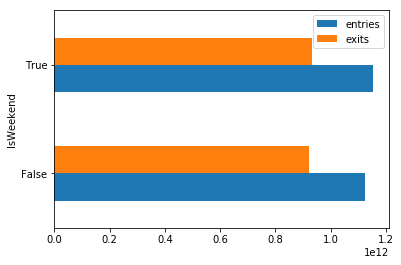

In [74]:
grouped['IsWeekend'] = grouped.Day.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')

# Drop a couple of columns

In [78]:
df = df.drop('traffic', axis=1)
df = df.drop('time', axis=1)
df.head()

,linename,c/a,unit,scp,station,division,date,desc,entries,exits,Num_Lines,Day
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,REGULAR,1417952,3267016,12,3
132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-31,REGULAR,68217145,17201834,12,4
132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,2018-08-30,REGULAR,68216902,17201755,12,3
132414,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,REGULAR,6291546,8895428,12,1
132412,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,REGULAR,6291234,8894593,12,1
